In [1]:
import time
%load_ext memory_profiler

to supress warnings from deprecated functions in libraries

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout

import pandas as pd
import numpy as np

from collections import Counter
import matplotlib.pyplot as plt
import math
import seaborn as sns

Using TensorFlow backend.


In [5]:
%memit

peak memory: 193.64 MiB, increment: 0.09 MiB


Using the dataset from winsconsin cancer dataset

In [8]:
df=pd.read_csv('data/winsconsin_dataset/wdbc.data.csv',header=None)

number of samples X number of features

In [10]:
df.shape

(569, 32)

In [11]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Check the number of samples by class 

In [13]:
Counter(df[1])

Counter({'B': 357, 'M': 212})

Remove the index column

In [14]:
df=df[df.columns[1:]]

In [16]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


From the data obtained from the dataset README, we can rename the features (wdbc.names)

In [17]:
names=["class","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean",
       "concavity_mean","concave_points_mean","symmetry_mean","fractal_dimension_mean",
       "radius_error","texture_error","perimeter_error","area_error","smoothness_error","compactness_error",
       "concavity_error","concave_points_error","symmetry_error","fractal_dimension_error",
       "radius_wl","texture_wl","perimeter_wl","area_wl","smoothness_wl","compactness_wl",
       "concavity_wl","concave_points_wl","symmetry_wl","fractal_dimension_wl"]


In [18]:
len(names)

31

In [19]:
df.columns=names

Checking the distribution of values in features according to class

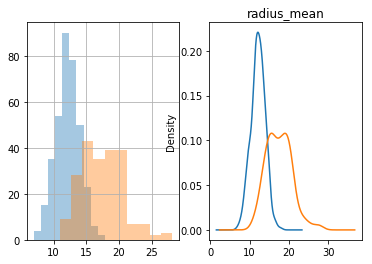

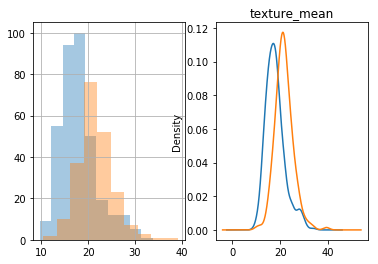

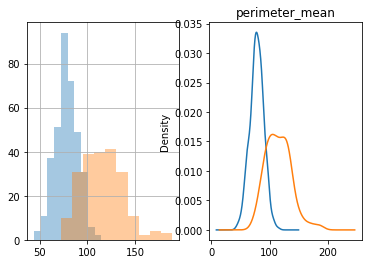

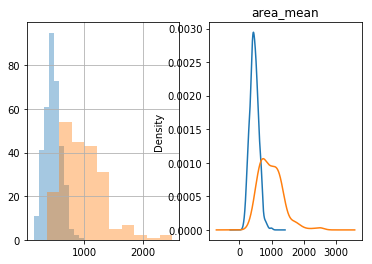

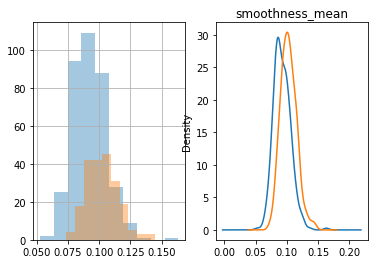

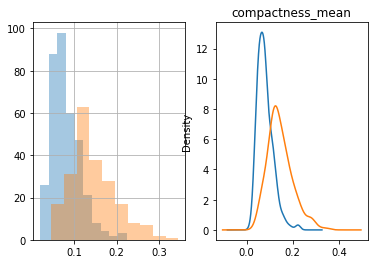

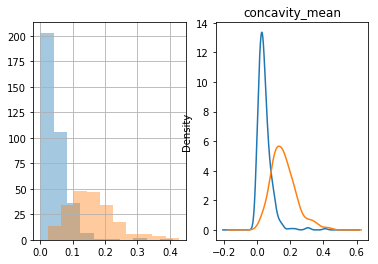

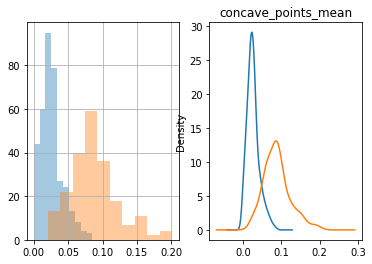

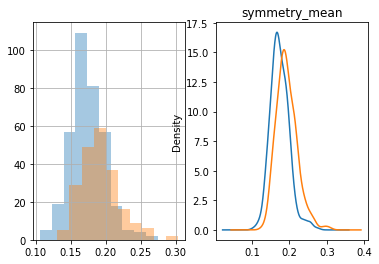

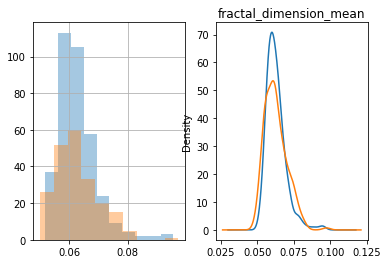

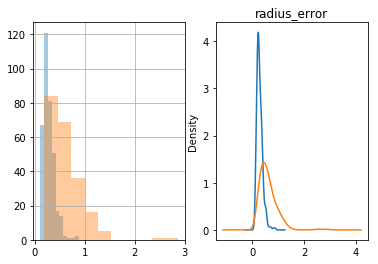

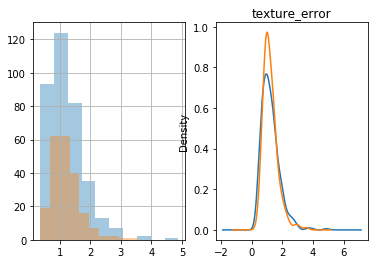

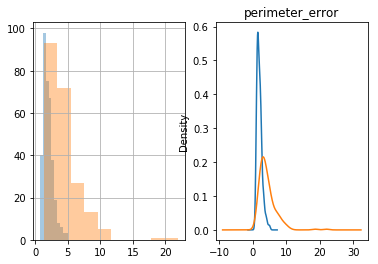

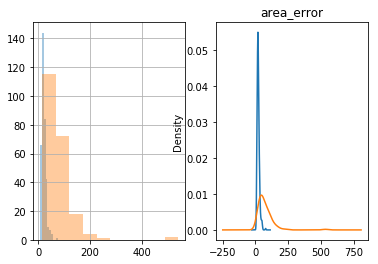

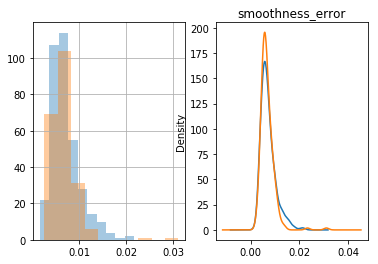

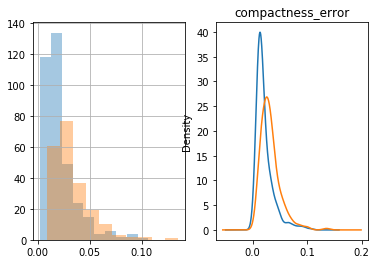

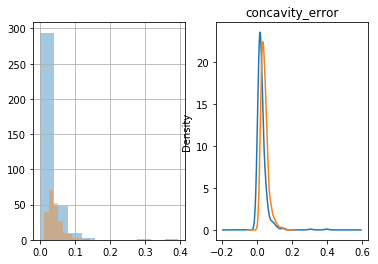

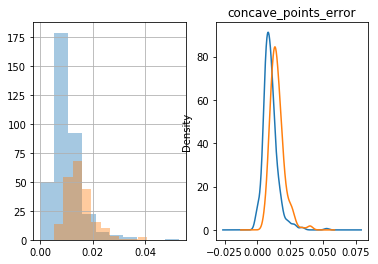

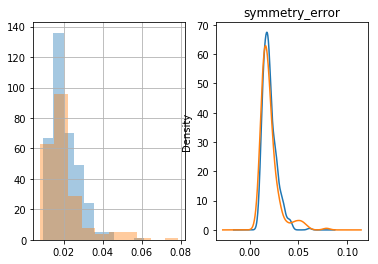

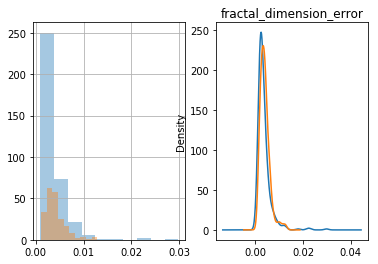

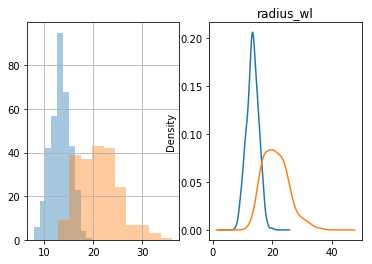

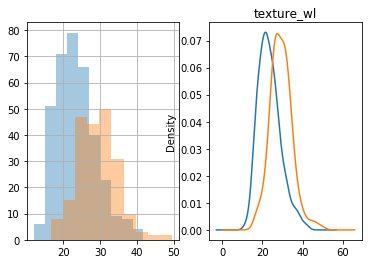

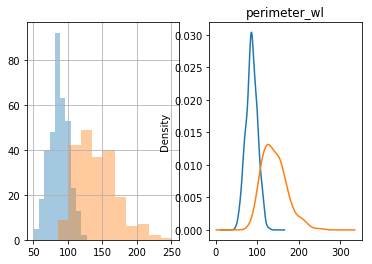

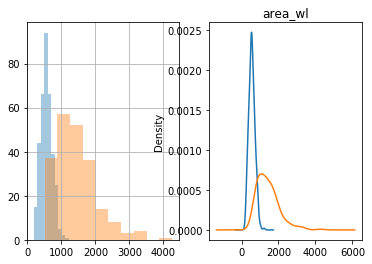

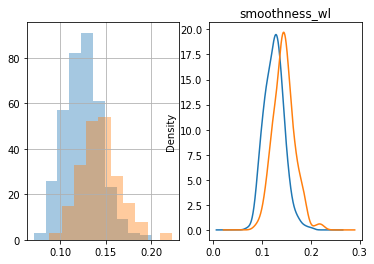

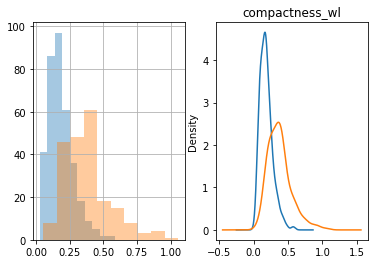

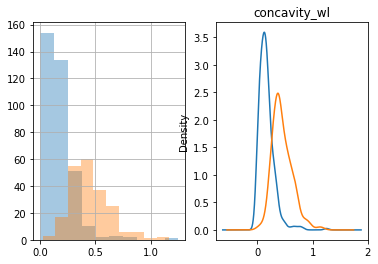

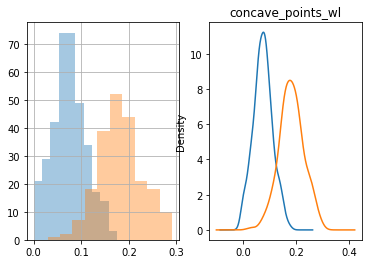

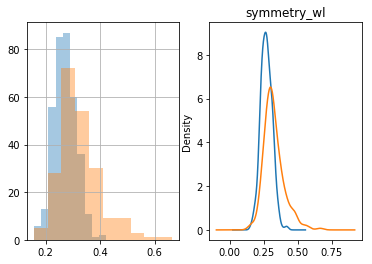

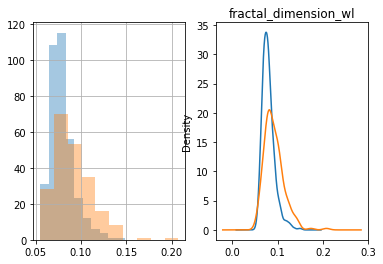

In [20]:
for i in list(df.columns[1:]):
    fig, axs = plt.subplots(ncols=2)
    df.groupby("class")[i].plot(kind='kde', ax=axs[1],title=i);
    df.groupby("class")[i].hist(alpha=0.4, ax=axs[0]);

In [21]:
df.head()

,class,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_wl,texture_wl,perimeter_wl,area_wl,smoothness_wl,compactness_wl,concavity_wl,concave_points_wl,symmetry_wl,fractal_dimension_wl
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Selecting the predictors

In [22]:
predictors=df.columns[1:]

checking the correlation of features of the dataset

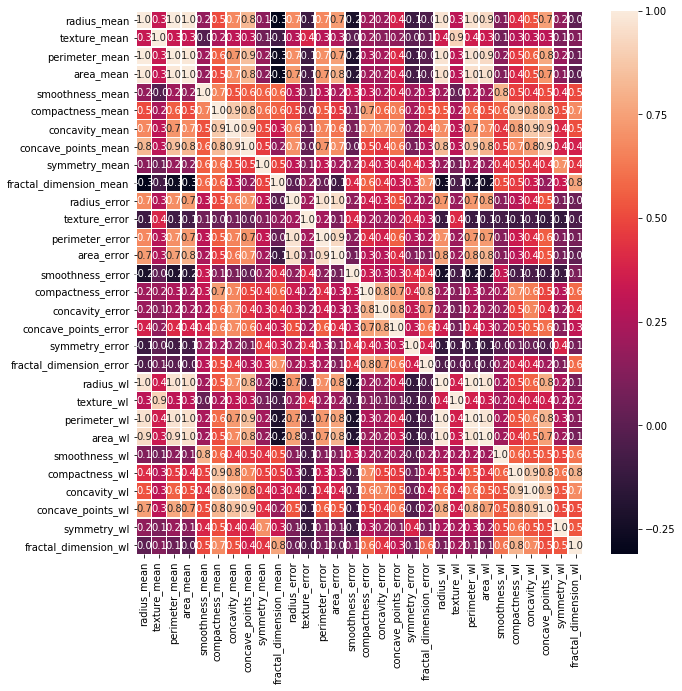

In [23]:

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df[predictors].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

### Using Keras library as framework

In [24]:
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, EarlyStopping
 

In [25]:
df['class']=np.array(df['class']=='M',dtype=int)

In [26]:
Counter(df['class'])

Counter({0: 357, 1: 212})

In [27]:
df.head()

,class,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_wl,texture_wl,perimeter_wl,area_wl,smoothness_wl,compactness_wl,concavity_wl,concave_points_wl,symmetry_wl,fractal_dimension_wl
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#df=df.sample(frac=1)

In [28]:
df.head()

,class,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_wl,texture_wl,perimeter_wl,area_wl,smoothness_wl,compactness_wl,concavity_wl,concave_points_wl,symmetry_wl,fractal_dimension_wl
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### a little bit of Feature Engineering

In [29]:
df['radius_square']=df['radius_mean']**2
df['perimeter_square']=df['perimeter_mean']**2
df['radiusXperimeter']=df['radius_mean']*df['perimeter_mean']
df['textureXsmoothness']=df['texture_mean']*df['smoothness_mean']
df['concavityXconcave']=df['concavity_mean']*df['concave_points_mean']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df[predictors], df['class'], test_size=0.3, random_state=42)

In [32]:
X_train.shape

(398, 35)

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
X_test.shape

(171, 35)

In [35]:
input_dim=X_train.shape[1]
input_dim

35

In [40]:
from keras.optimizers import Adam

In [41]:
histories=[]
values=[]
for i in range(5):


    print("Iteration:",i)

    adam=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=10e-8, decay=0.0, amsgrad=False)
    initializer='he_uniform'
    activation='relu'

    model = Sequential()
    model.add(Dense(6, kernel_initializer=initializer,input_dim=input_dim,activation='relu'))
    model.add(Dropout(0.15))
    model.add(Dense(6, kernel_initializer=initializer,input_dim=input_dim,activation='relu'))
    model.add(Dropout(0.15))


    model.add(Dense(1,activation='sigmoid'))


    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    #model.summary()


    
    filepath="iteration_"+str(i)+"_weights.best.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# check 5 epochs
    early_stop = EarlyStopping(monitor='val_acc', patience=40, mode='max') 
    callbacks_list = [checkpoint, early_stop]

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000,batch_size=5 ,callbacks=callbacks_list,verbose=0)


    model.load_weights(filepath, by_name=False)
    scores = model.evaluate(X_train, y_train, verbose=0)
    print("Training %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Test %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    histories.append(history)
    values.append(scores[1]*100)
    
#history=model.fit(X_train, y_train, nb_epoch=50, batch_size=5, validation_data=(X_test,y_test), verbose=1)



Iteration: 0

Epoch 00001: val_acc improved from -inf to 0.64912, saving model to iteration_0_weights.best.hdf5

Epoch 00002: val_acc improved from 0.64912 to 0.84795, saving model to iteration_0_weights.best.hdf5

Epoch 00003: val_acc improved from 0.84795 to 0.91813, saving model to iteration_0_weights.best.hdf5

Epoch 00004: val_acc improved from 0.91813 to 0.94737, saving model to iteration_0_weights.best.hdf5

Epoch 00005: val_acc did not improve

Epoch 00006: val_acc improved from 0.94737 to 0.95906, saving model to iteration_0_weights.best.hdf5

Epoch 00007: val_acc did not improve

Epoch 00008: val_acc improved from 0.95906 to 0.97661, saving model to iteration_0_weights.best.hdf5

Epoch 00009: val_acc did not improve

Epoch 00010: val_acc did not improve

Epoch 00011: val_acc improved from 0.97661 to 0.98246, saving model to iteration_0_weights.best.hdf5

Epoch 00012: val_acc did not improve

Epoch 00013: val_acc did not improve

Epoch 00014: val_acc did not improve

Epoch 000


Epoch 00054: val_acc did not improve

Epoch 00055: val_acc did not improve
Training acc: 98.24%
Test acc: 98.83%
Iteration: 3

Epoch 00001: val_acc improved from -inf to 0.83041, saving model to iteration_3_weights.best.hdf5

Epoch 00002: val_acc improved from 0.83041 to 0.94152, saving model to iteration_3_weights.best.hdf5

Epoch 00003: val_acc improved from 0.94152 to 0.96491, saving model to iteration_3_weights.best.hdf5

Epoch 00004: val_acc did not improve

Epoch 00005: val_acc did not improve

Epoch 00006: val_acc improved from 0.96491 to 0.97076, saving model to iteration_3_weights.best.hdf5

Epoch 00007: val_acc did not improve

Epoch 00008: val_acc improved from 0.97076 to 0.97661, saving model to iteration_3_weights.best.hdf5

Epoch 00009: val_acc did not improve

Epoch 00010: val_acc did not improve

Epoch 00011: val_acc did not improve

Epoch 00012: val_acc did not improve

Epoch 00013: val_acc did not improve

Epoch 00014: val_acc improved from 0.97661 to 0.98246, saving

### Values of accuracy for 5 executions

In [42]:
values

[99.41520467836257,
 97.6608187134503,
 98.83040935672514,
 99.41520467836257,
 99.41520467836257]

### Plot histories of accuracy and loss

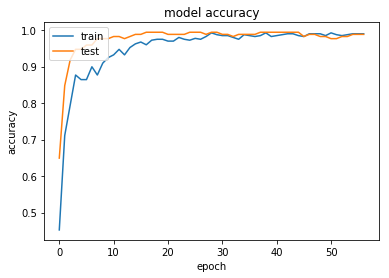

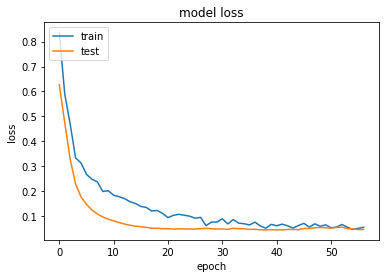

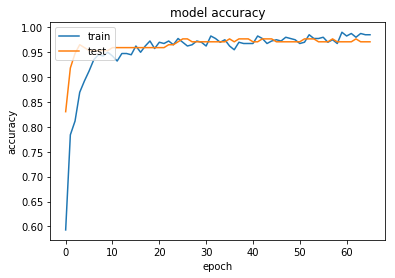

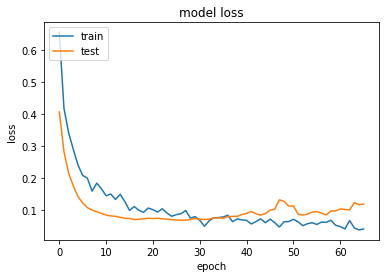

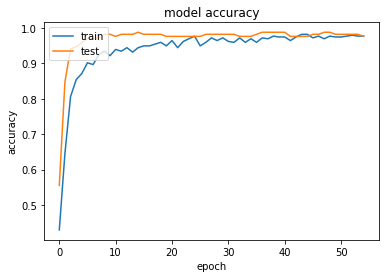

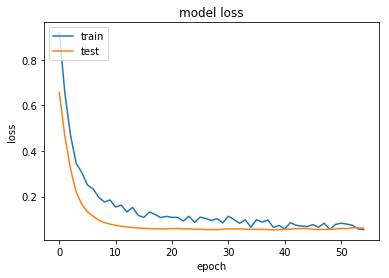

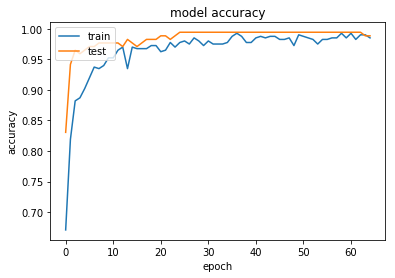

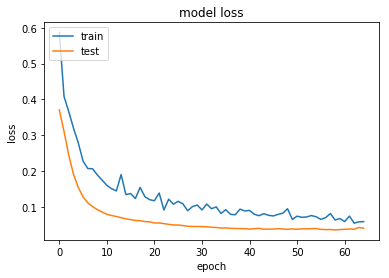

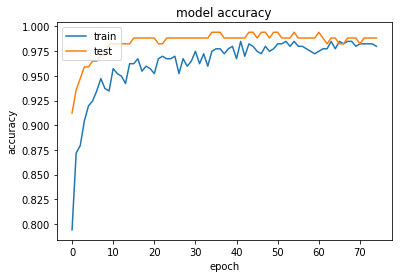

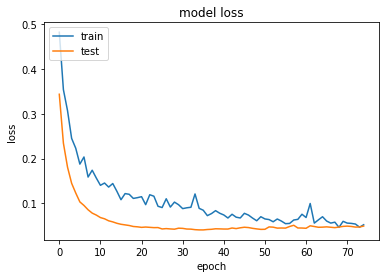

In [43]:
for history in histories:
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
# summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [44]:
model.load_weights('iteration_0_weights.best.hdf5', by_name=False)

In [45]:
scores = model.evaluate(X_train, y_train, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 97.74%


In [46]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 99.42%


In [47]:
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [48]:
y_pred=np.array(model.predict(X_test)>.5,dtype=int)

In [49]:
ac = accuracy_score(y_test,y_pred)

### Confusion Matrix

Accuracy is:  0.9941520467836257


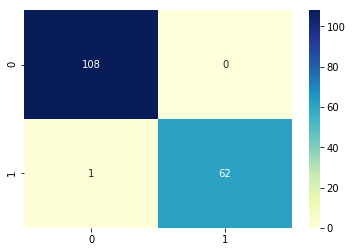

In [50]:

print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap="YlGnBu");